## Linear Regression

## Medical Insurance Cost – Simple Linear Regression
Using the “Medical Cost Personal Dataset” (Kaggle)  
Link: https://www.kaggle.com/mirichoi0218/insurance  


   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data column

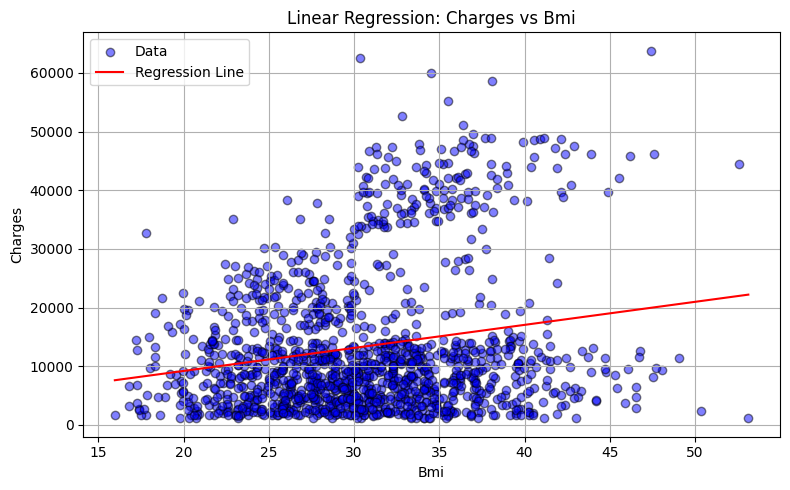


--- Linear Regression: charges vs bmi ---
R² Score: 0.03970193117941878
RMSE: 12210.039190698571


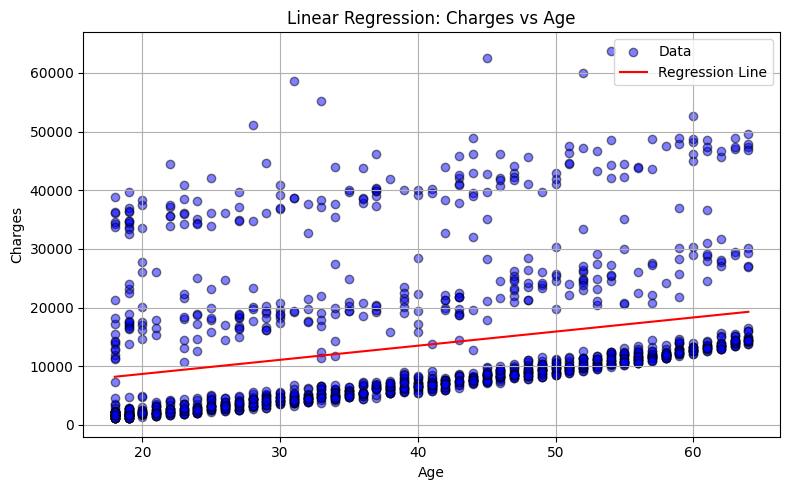


--- Linear Regression: charges vs age ---
R² Score: 0.12408973539501944
RMSE: 11661.21595205864


In [5]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

df = pd.read_csv('Medical_Cost.csv')
print(df.head())
print(df.describe())
print(df.info())

df_processed = pd.get_dummies(df, drop_first=True)
print(df_processed.columns)

feature = 'bmi'     # numeric feature
target = 'charges'


def plot_numeric_feature(df, feature, target='charges'):
    X = df[[feature]]
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)

    x_range = np.linspace(X[feature].min(), X[feature].max(), 100)
    x_range_df = pd.DataFrame({feature: x_range})
    y_range_pred = model.predict(x_range_df)


    plt.figure(figsize=(8, 5))
    plt.scatter(X, y, color='blue', label='Data', alpha=0.5, edgecolors='k')
    plt.plot(x_range, y_range_pred, color='red', label='Regression Line')
    plt.xlabel(feature.replace('_', ' ').title())
    plt.ylabel(target.replace('_', ' ').title())
    plt.title(f'Linear Regression: {target.replace("_", " ").title()} vs {feature.replace("_", " ").title()}')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    print(f"\n--- Linear Regression: {target} vs {feature} ---")
    print("R² Score:", model.score(X_test, y_test))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, model.predict(X_test))))

  
plot_numeric_feature(df_processed, feature, target=target)

 
for feat in ['age']:
    plot_numeric_feature(df_processed, feat, target=target)


